In [73]:
# Network-x imports
from networkx.readwrite.graphml import read_graphml
import networkx as nx

# Graph Kernels import
from grakel.utils import graph_from_networkx
from grakel.kernels import WeisfeilerLehman, VertexHistogram, ShortestPath, RandomWalk

# SVM imports
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# general imports
import os

# Data Preprocessing

## Data Loading

In [5]:
graphs = list()
labels = list()
tags = {'Bubble': 0, 'Insertion': 1, 'Selection': 2, 'Counting': 3, 'Merge': 4, 'Quick': 5}

for algo in os.listdir('CFG'):
    count = 1
    for file in os.listdir('CFG/'+algo):
        graphs.append(read_graphml('CFG/'+algo+'/'+file))
        labels.append(tags[algo])
        if(count == 700):
            break
        count += 1

In [6]:
len(graphs), len(labels)

(4200, 4200)

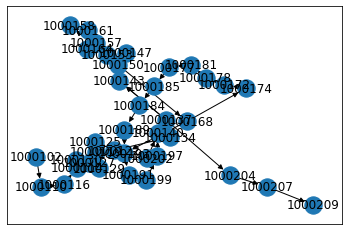

In [7]:
nx.draw_networkx(graphs[0])

In [10]:
G_train, G_test, Y_train, Y_test = train_test_split(graphs, labels, test_size=0.20, random_state=42)
len(G_train), len(G_test), len(Y_train), len(Y_test)

(3360, 840, 3360, 840)

## Convert Network-X Graph to Adj List Representation of GraKel

In [11]:
G_train = list(graph_from_networkx(G_train, node_labels_tag='label'))
G_test = list(graph_from_networkx(G_test, node_labels_tag='label'))

In [83]:
G_train[0]

[{'1000108': {'1000118': 1.0},
  '1000116': {'1000123': 1.0},
  '1000118': {'1000116': 1.0},
  '1000120': {'1000130': 1.0},
  '1000122': {'1000120': 1.0},
  '1000123': {'1000127': 1.0},
  '1000124': {'1000122': 1.0},
  '1000125': {'1000124': 1.0},
  '1000127': {'1000125': 1.0},
  '1000130': {'1000133': 1.0},
  '1000133': {'1000140': 1.0, '1000144': 1.0},
  '1000136': {'1000133': 1.0},
  '1000138': {'1000136': 1.0},
  '1000140': {'1000138': 1.0},
  '1000144': {'1000147': 1.0},
  '1000147': {'1000155': 1.0, '1000215': 1.0},
  '1000150': {'1000147': 1.0},
  '1000153': {'1000160': 1.0},
  '1000155': {'1000153': 1.0},
  '1000158': {'1000165': 1.0},
  '1000160': {'1000158': 1.0},
  '1000164': {'1000177': 1.0, '1000188': 1.0},
  '1000165': {'1000164': 1.0, '1000169': 1.0},
  '1000168': {'1000164': 1.0},
  '1000169': {'1000168': 1.0},
  '1000174': {'1000183': 1.0},
  '1000175': {'1000180': 1.0},
  '1000177': {'1000175': 1.0},
  '1000180': {'1000174': 1.0},
  '1000183': {'1000165': 1.0},
  '100

# Kernel Computation & SVM

## 1. Compute the Weisfeiler Lehman Kernel

In [66]:
# Initialize a Weisfeiler-Lehman subtree kernel
gk = WeisfeilerLehman()

In [67]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [68]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [69]:
# Test classifier
Y_pred = clf.predict(K_test)

In [70]:
# Evaluate the predictions
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8678571428571429


In [71]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[115   6   5   0   3   1]
 [  7  93   3   1   5   1]
 [ 10   9 128   0  12   4]
 [  0   2   1 146   7   0]
 [  0   1   3   2 125   6]
 [  1   1   3   0  17 122]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       130
           1       0.83      0.85      0.84       110
           2       0.90      0.79      0.84       163
           3       0.98      0.94      0.96       156
           4       0.74      0.91      0.82       137
           5       0.91      0.85      0.88       144

    accuracy                           0.87       840
   macro avg       0.87      0.87      0.87       840
weighted avg       0.87      0.87      0.87       840



## 2. The random walk kernel class

In [74]:
gk = RandomWalk()

In [ ]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [ ]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

In [ ]:
# Test classifier
Y_pred = clf.predict(K_test)

In [ ]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

## 3. 